In [145]:
import sympy as sp
import numpy as np
sp.init_printing()

# for more flexibility in formatting answers
from IPython.display import Math, Latex

### Problem 1.3

Find the angle between the diagonals of a cube.

---
#### Solution:

We represent the diagonals of the cube as two vectors:

In [133]:
D_1 = sp.Matrix([[1,1,1]])
D_2 = sp.Matrix([[-1,1,1]])

Then we take the dot product and note that $$\mathbf{D}_1\cdot\mathbf{D}_2 = D_1 D_2 \cos(\theta).$$

In [136]:
# D1 and D2 here are the magnitudes, not the vectors
theta, D1, D2 = sp.symbols('theta D_1 D_2')

sp.Eq(D_1.dot(D_2), D1*D2*sp.cos(theta))

Solve for $\theta$...

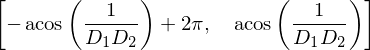

In [137]:
sp.solve(sp.Eq(D_1.dot(D_2), D1*D2*sp.cos(theta)), theta)

The inverse cosine is multivalued, which is why we have multiple solutions here. We want the second one.

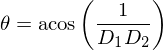

In [139]:
ans = sp.Eq(theta, sp.solve(sp.Eq(D_1.dot(D_2), D1*D2*sp.cos(theta)), theta)[1])
ans

Now, turn it into a number.

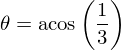

In [140]:
magnitudes = {D1: sp.sqrt(D_1.dot(D_1)),
              D2: sp.sqrt(D_2.dot(D_2))}

ans.subs(magnitudes)

If we want an actual number, we can use `sp.N`:

In [146]:
numerical_ans = sp.N(ans.subs(magnitudes))
numerical_ans

That's in radians. What does it look like in degrees?

In [158]:
sp.N(sp.Eq(numerical_ans.lhs, numerical_ans.rhs * 180/sp.pi))

---

---

### Problem 1.5

Prove the $\mathbf{BAC} - \mathbf{CAB}$ rule by writing out both sides in component form.

---
#### Solution:

The $\mathbf{BAC} - \mathbf{CAB}$ rule is $$\mathbf{A}\times\left(\mathbf{B}\times\mathbf{C}\right) = \mathbf{B}(\mathbf{A}\cdot\mathbf{C}) - \mathbf{C}(\mathbf{A}\cdot\mathbf{B}).$$



In [60]:
A = sp.symbols('A_{x:z}')
B = sp.symbols('B_{x:z}')
C = sp.symbols('C_{x:z}')

Avec = sp.Matrix([[A[0], A[1], A[2]]])
Bvec = sp.Matrix([[B[0], B[1], B[2]]])
Cvec = sp.Matrix([[C[0], C[1], C[2]]])

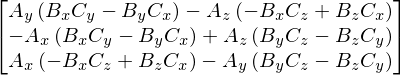

In [70]:
lhs = Avec.cross(Bvec.cross(Cvec))
# transpose makes it easier to read
lhs.T

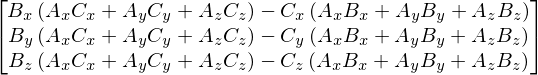

In [69]:
rhs = Bvec*(Avec.dot(Cvec)) - Cvec*(Avec.dot(Bvec))
rhs.T

In [67]:
lhs == rhs

False

In [68]:
sp.simplify(lhs - rhs)

A different way, using the `vector` module:

In [6]:
from sympy.physics import vector
import numpy as np

The vectors from `sympy`'s `vector` module require the definition of a reference frame.

In [79]:
N = vector.ReferenceFrame('N', latexs=['\hat{\mathbf{x}}', '\hat{\mathbf{y}}', '\hat{\mathbf{z}}'])

A = sp.symbols('A_{x:z}')
B = sp.symbols('B_{x:z}')
C = sp.symbols('C_{x:z}')

The `latexs` argument isn't necessary, but I don't like the default way the basis vectors of a reference frame are printed, and this fixes that.

Once the reference frame is defined, we build vectors by adding products of components with the appropriate unit vectors, as we would by hand. This is a bit easier if we use elementwise multiplication of `numpy` arrays.

In [80]:
basis = np.array([N.x, N.y, N.z])

Avec = (np.array(A)*basis).sum()
Bvec = (np.array(B)*basis).sum()
Cvec = (np.array(C)*basis).sum()

Avec

Cross products work the same way as they do for `Matrix`-style vectors:

In [81]:
Bvec.cross(Cvec)

... so it's easy to build the left hand side of the BAC - CAB rule.

In [82]:
lhs = (Avec.cross(Bvec.cross(Cvec))).simplify()
lhs

For the right hand side, we need dot products, which again work as expected.

In [86]:
rhs = (Bvec*(Avec.dot(Cvec)) - Cvec*(Avec.dot(Bvec))).simplify()
rhs

In [87]:
lhs == rhs

True

This equality test didn't work for the `Matrix`-style vectors, but does work here. I'm not sure why that is.

---

---

### Problem 1.7

In [131]:
rfrak, rfrakabs, rfrakhat = sp.symbols('rscrbm rscr rscrhat')

r = sp.Matrix([[4,6,8]])
rprime = sp.Matrix([[2,8,7]])
scriptr = r - rprime
sp.Eq(rfrak, scriptr.T, evaluate=False)

rscrbm = ⎡2 ⎤
         ⎢  ⎥
         ⎢-2⎥
         ⎢  ⎥
         ⎣1 ⎦

In [89]:
magnitude = sp.sqrt(scriptr.dot(scriptr))
sp.Eq(rfrakabs, magnitude, evaluate=False)

In [132]:
unitvec = scriptr/magnitude
sp.Eq(rfrakhat, unitvec.T, evaluate=False)

rscr̂ = ⎡2/3 ⎤
        ⎢    ⎥
        ⎢-2/3⎥
        ⎢    ⎥
        ⎣1/3 ⎦

---

---
For the next three problems, you're calculating gradients, divergences, and curls. The `sympy.physics.vector` module contains functions to do this, but they require reference frames. If you're working with vectors as matrices, it's simpler to write your own functions. That's the approach I take below.


### Problem 1.11

Find the gradients of the following functions:
1. $f(x,y,z) = x^2 + y^3 +z^4 $
2. $f(x,y,z) = x^2y^3z^4$
3. $f(x,y,z) = e^x\sin(y)\ln(z) $
---
#### Solution:

In [121]:
def gradient(phi):
    """Compute the gradient of phi"""
    x,y,z = sp.symbols('x y z')
    phi_x = sp.diff(phi,x)
    phi_y = sp.diff(phi,y)
    phi_z = sp.diff(phi,z)
    
    return sp.Matrix([[phi_x, phi_y, phi_z]])

x,y,z = sp.symbols('x y z')
fa = x**2 + y**3 + z**4
fb = x**2*y**3*z**4
fc = sp.exp(x)*sp.sin(y)*sp.ln(z)

In [123]:
Math("\\nabla \left({}\\right) = {}".format(sp.latex(fa), sp.latex(gradient(fa).T)))

<IPython.core.display.Math object>

In [124]:
Math("\\nabla \left({}\\right) = {}".format(sp.latex(fb), sp.latex(gradient(fb).T)))

<IPython.core.display.Math object>

For mathematical functions, we have to be careful to use the sympy versions which can handle symbols as inputs.

In [125]:
Math("\\nabla \left({}\\right) = {}".format(sp.latex(fc), sp.latex(gradient(fc).T)))

<IPython.core.display.Math object>

---

---

### Problem 1.15

Calculate the divergence of the following functions:
1. $\mathbf{v}_a = x^2 \hat{\mathbf{x}} + 3xz^2\hat{\mathbf{y}} - 2xz\hat{\mathbf{z}}$
2. $\mathbf{v}_b = xy \hat{\mathbf{x}} + 2yz\hat{\mathbf{y}} + 3zx\hat{\mathbf{z}}$
3. $\mathbf{v}_c = y^2 \hat{\mathbf{x}} + 2\left(xy + z^2\right)\hat{\mathbf{y}} + 2yz\hat{\mathbf{z}}$

---
#### Solution:


In [95]:
x,y,z = sp.symbols('x y z')
v_a, v_b, v_c = sp.symbols('v_a v_b v_c')

va = sp.Matrix([[x**2, 3*x*z**2, -2*x*z]])
vb = sp.Matrix([[x*y, 2*y*z, 3*x*z]])
vc = sp.Matrix([[y**2, 2*(x*y+z**2), 2*y*z]])

In [96]:
def divergence(vec):
    """Take the divergence of vec."""
    x,y,z = sp.symbols('x y z')
    xterm = sp.diff(vec[0], x)
    yterm = sp.diff(vec[1], y)
    zterm = sp.diff(vec[2], z)
    
    return xterm + yterm + zterm

In [38]:
Math("\\nabla \cdot {} = {}".format(sp.latex(va.T), sp.latex(divergence(va))))

<IPython.core.display.Math object>

In [37]:
Math("\\nabla \cdot {} = {}".format(sp.latex(vb.T), sp.latex(divergence(vb))))

<IPython.core.display.Math object>

In [36]:
Math("\\nabla \cdot {} = {}".format(sp.latex(vc.T), sp.latex(divergence(vc))))

<IPython.core.display.Math object>

---

---
### Problem 1.18

Calculate the curls of the vector functions in problem 1.15.

---

#### Solution:

In [7]:
def curl(vec):
    """Take the curl of vec."""

    x,y,z = sp.symbols('x y z')
    
    # yz - zy
    curl_x = sp.diff(vec[2], y) - sp.diff(vec[1], z)
    
    # zx - xz
    curl_y = sp.diff(vec[0],z) - sp.diff(vec[2], x)
    
    # xy - yx
    curl_z = sp.diff(vec[1], x) - sp.diff(vec[0], y)
    
    return sp.Matrix([[curl_x, curl_y, curl_z]])

In [42]:
Math("\\nabla \\times {} = {}".format(sp.latex(va.T), sp.latex(curl(va).T)))

<IPython.core.display.Math object>

In [43]:
Math("\\nabla \\times {} = {}".format(sp.latex(vb.T), sp.latex(curl(vb).T)))

<IPython.core.display.Math object>

In [41]:
Math("\\nabla \\times {} = {}".format(sp.latex(vc.T), sp.latex(curl(vc).T)))

<IPython.core.display.Math object>